<a href="https://colab.research.google.com/github/AbrahamMulat/TensorFlow-deep-learning-Exercise-and-Project/blob/main/01_Neural_network_regression_with_TensorFlow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛠 01. Neural network regression with TensorFlow Exercises

1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
  * Building a larger model (how does one with 4 dense layers go?).
  * Increasing the number of units in each layer.
  * Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?
  * What happens if you train for longer (say 300 epochs instead of 200)?
4. Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it.

In [1]:
# Import libraries
import tensorflow as tf # for modeling
import numpy as np # for numeric computing
import pandas as pd # for data processing
import matplotlib.pyplot as plt # for data visualization
from sklearn.datasets import make_regression # to create regression dataset



In [2]:
# Check GPU availability - for fast computing
!nvidia-smi

Wed Oct  5 05:45:57 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.

To create a regression dataset, we can use either [sklearn.datasets.make_regression()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html) function or we can create features and labels using numpy.

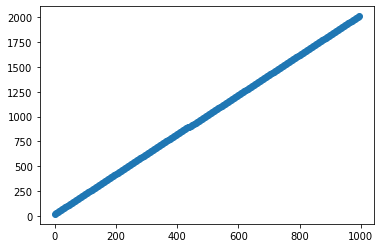

In [3]:
# Let's create a regression dataset using numpy
# create features (x the independent variable) 
x = np.arange(0, 1000, 5) # make 200 sample  with step 5 from 0 to 1000(excluded)

# create labels (y the dependent variable)
y = 2*x + 20

# Visualize our dataset
plt.scatter(x, y)

In [4]:
len(x), len(y)

(200, 200)

In [5]:
# Turn our dataset into tensors
x = tf.cast(tf.constant(x), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
x, y

(<tf.Tensor: shape=(200,), dtype=float32, numpy=
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
        110., 115., 120., 125., 130., 135., 140., 145., 150., 155., 160.,
        165., 170., 175., 180., 185., 190., 195., 200., 205., 210., 215.,
        220., 225., 230., 235., 240., 245., 250., 255., 260., 265., 270.,
        275., 280., 285., 290., 295., 300., 305., 310., 315., 320., 325.,
        330., 335., 340., 345., 350., 355., 360., 365., 370., 375., 380.,
        385., 390., 395., 400., 405., 410., 415., 420., 425., 430., 435.,
        440., 445., 450., 455., 460., 465., 470., 475., 480., 485., 490.,
        495., 500., 505., 510., 515., 520., 525., 530., 535., 540., 545.,
        550., 555., 560., 565., 570., 575., 580., 585., 590., 595., 600.,
        605., 610., 615., 620., 625., 630., 635., 640., 645., 650., 655.,
        660., 665., 670., 675., 680., 685., 690., 695., 700., 7

In [6]:
# Split our dataset into training and test set

# Split features into train and test
x_train = x[:160] # first 160 for training (80%)
x_test = x[160:] # last 40 for testing (20%)

print(len(x_train), len(x_test))

# split labels into train and test
y_train = y[:160]
y_test = y[160:]
print(len(y_train), len(y_test))

160 40
160 40


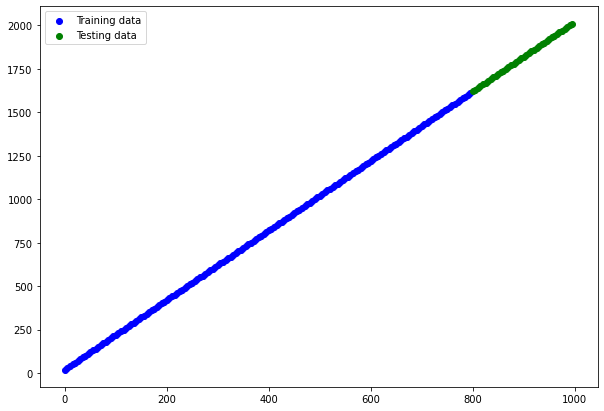

In [7]:
# Visualize the data
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(x_train, y_train, c="b", label="Training data")
# Plot test data in green 
plt.scatter(x_test, y_test, c="g", label="Testing data")
# Show a legend
plt.legend()

In [8]:
# Build a model

# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

# 3. Fit the model
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 2s 3ms/step - loss: 587.5646 - mae: 587.5646
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 585.5997 - mae: 585.5997
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 583.5809 - mae: 583.5809
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 581.6141 - mae: 581.6141
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 579.6484 - mae: 579.6484
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 577.6393 - mae: 577.6393
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 575.6872 - mae: 575.6872
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 573.6750 - mae: 573.6750
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 571.6595 - mae: 571.6595
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 569.7119 - mae: 569.7119
Epoch 11/100
5/5 [=====================

In [9]:
# Check model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [10]:
y_pred = model.predict(x_test)
y_pred

array([[ 855.1653 ],
       [ 860.50696],
       [ 865.8486 ],
       [ 871.19025],
       [ 876.5319 ],
       [ 881.8736 ],
       [ 887.2152 ],
       [ 892.5569 ],
       [ 897.89856],
       [ 903.2402 ],
       [ 908.58185],
       [ 913.9235 ],
       [ 919.2652 ],
       [ 924.6068 ],
       [ 929.9485 ],
       [ 935.29016],
       [ 940.63184],
       [ 945.97345],
       [ 951.3151 ],
       [ 956.6568 ],
       [ 961.9984 ],
       [ 967.3401 ],
       [ 972.68176],
       [ 978.02344],
       [ 983.36505],
       [ 988.7067 ],
       [ 994.0484 ],
       [ 999.3901 ],
       [1004.7317 ],
       [1010.07336],
       [1015.41504],
       [1020.75665],
       [1026.0984 ],
       [1031.44   ],
       [1036.7816 ],
       [1042.1233 ],
       [1047.465  ],
       [1052.8066 ],
       [1058.1483 ],
       [1063.49   ]], dtype=float32)

In [11]:
y_test

<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([1620., 1630., 1640., 1650., 1660., 1670., 1680., 1690., 1700.,
       1710., 1720., 1730., 1740., 1750., 1760., 1770., 1780., 1790.,
       1800., 1810., 1820., 1830., 1840., 1850., 1860., 1870., 1880.,
       1890., 1900., 1910., 1920., 1930., 1940., 1950., 1960., 1970.,
       1980., 1990., 2000., 2010.], dtype=float32)>

In [12]:
# Let's create a plotting function
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data = x_test,
                     test_labels=y_test,
                     predictions=y_pred):
    """
    Plots training data, test data and compares predictions to ground truth labels.
    """
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend()


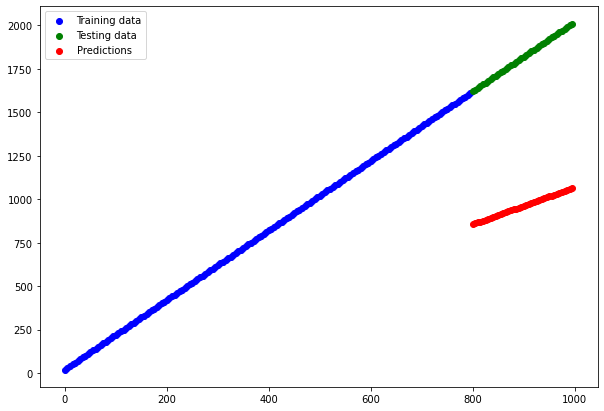

In [13]:
plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data = x_test,
                     test_labels=y_test,
                     predictions=y_pred)

oops, our model performs too bad with a single layer and a neuron as we can see the gap in the above graph.

## 2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?

In [14]:
# Now let's build another model with 4 layers

#set random seed
tf.random.set_seed(42)

# create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(10, name="layer_1"),
    tf.keras.layers.Dense(10, name="layer_2"),
    tf.keras.layers.Dense(10, name="layer_3"),
    tf.keras.layers.Dense(1, name="output_layer")
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# Fit the model
model_1.fit(x_train, y_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 1025.9655 - mae: 1025.9655
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 968.9095 - mae: 968.9095
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 916.7286 - mae: 916.7286
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 870.2539 - mae: 870.2539
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 825.8322 - mae: 825.8322
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 780.3269 - mae: 780.3269
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 733.9410 - mae: 733.9410
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 681.4362 - mae: 681.4362
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 621.1309 - mae: 621.1309
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 552.5629 - mae: 552.5629
Epoch 11/100
5/5 [===================

In [15]:
# Get model summary
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 layer_1 (Dense)             (None, 10)                110       
                                                                 
 layer_2 (Dense)             (None, 10)                110       
                                                                 
 layer_3 (Dense)             (None, 10)                110       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [16]:
y_pred = model_1.predict(x_test)

In [17]:
y_pred

array([[1626.664 ],
       [1636.7902],
       [1646.9161],
       [1657.0417],
       [1667.1676],
       [1677.2937],
       [1687.4197],
       [1697.5457],
       [1707.6714],
       [1717.7974],
       [1727.9232],
       [1738.0491],
       [1748.175 ],
       [1758.3009],
       [1768.4271],
       [1778.5529],
       [1788.6788],
       [1798.8049],
       [1808.9307],
       [1819.0568],
       [1829.1825],
       [1839.3085],
       [1849.4343],
       [1859.5603],
       [1869.6862],
       [1879.8121],
       [1889.9381],
       [1900.0638],
       [1910.1901],
       [1920.3159],
       [1930.4419],
       [1940.568 ],
       [1950.6938],
       [1960.8196],
       [1970.9454],
       [1981.0715],
       [1991.1974],
       [2001.3235],
       [2011.4493],
       [2021.5752]], dtype=float32)

In [18]:
y_test

<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([1620., 1630., 1640., 1650., 1660., 1670., 1680., 1690., 1700.,
       1710., 1720., 1730., 1740., 1750., 1760., 1770., 1780., 1790.,
       1800., 1810., 1820., 1830., 1840., 1850., 1860., 1870., 1880.,
       1890., 1900., 1910., 1920., 1930., 1940., 1950., 1960., 1970.,
       1980., 1990., 2000., 2010.], dtype=float32)>

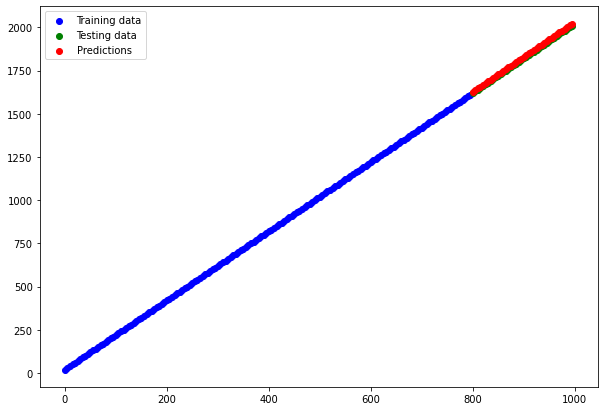

In [19]:
plot_predictions(train_data=x_train,
                 train_labels=y_train,
                 test_data=x_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Wow, see the improvemnt 

In [20]:
# Evaluate the model
model_1.evaluate(x_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 9.1196 - mae: 9.1196


[9.119607925415039, 9.119607925415039]

In [28]:
model_1.predict([100.0]) # y=2x+20 -> y = 2*100+20 = 220

array([[209.0338]], dtype=float32)

In [29]:
# Change y_pred to tensor
tf.constant(y_pred)

<tf.Tensor: shape=(40, 1), dtype=float32, numpy=
array([[1626.664 ],
       [1636.7902],
       [1646.9161],
       [1657.0417],
       [1667.1676],
       [1677.2937],
       [1687.4197],
       [1697.5457],
       [1707.6714],
       [1717.7974],
       [1727.9232],
       [1738.0491],
       [1748.175 ],
       [1758.3009],
       [1768.4271],
       [1778.5529],
       [1788.6788],
       [1798.8049],
       [1808.9307],
       [1819.0568],
       [1829.1825],
       [1839.3085],
       [1849.4343],
       [1859.5603],
       [1869.6862],
       [1879.8121],
       [1889.9381],
       [1900.0638],
       [1910.1901],
       [1920.3159],
       [1930.4419],
       [1940.568 ],
       [1950.6938],
       [1960.8196],
       [1970.9454],
       [1981.0715],
       [1991.1974],
       [2001.3235],
       [2011.4493],
       [2021.5752]], dtype=float32)>

In [30]:
y_test.shape, y_pred.shape

(TensorShape([40]), (40, 1))

In [31]:
# Squeeze y_pred to the same shape as y_test to calculate mae nand mse
y_pred = tf.squeeze(y_pred)

In [32]:
# Calculate the mean absolute error (mae)
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=9.119608>

In [33]:
# Calculate the mean square error (mse)
mse = tf.metrics.mean_squared_error(y_test, y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=85.28029>

In [56]:
# It looks our model can still be improved, Let's build one more model 
# This time we only use three hidden layers each with a different neuron and train it for 50 more epochs.

# set random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(50, name="layer_1"),
    tf.keras.layers.Dense(10, name="layer_2"),
    tf.keras.layers.Dense(1, name="output_layer")
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
history = model_2.fit(x_train, y_train, epochs=150)

Epoch 1/150
5/5 [==============================] - 0s 5ms/step - loss: 609.6384 - mae: 609.6384
Epoch 2/150
5/5 [==============================] - 0s 5ms/step - loss: 385.9877 - mae: 385.9877
Epoch 3/150
5/5 [==============================] - 0s 5ms/step - loss: 117.8466 - mae: 117.8466
Epoch 4/150
5/5 [==============================] - 0s 4ms/step - loss: 101.5200 - mae: 101.5200
Epoch 5/150
5/5 [==============================] - 0s 7ms/step - loss: 66.4491 - mae: 66.4491
Epoch 6/150
5/5 [==============================] - 0s 4ms/step - loss: 53.5328 - mae: 53.5328
Epoch 7/150
5/5 [==============================] - 0s 4ms/step - loss: 32.1620 - mae: 32.1620
Epoch 8/150
5/5 [==============================] - 0s 4ms/step - loss: 25.8148 - mae: 25.8148
Epoch 9/150
5/5 [==============================] - 0s 4ms/step - loss: 17.2206 - mae: 17.2206
Epoch 10/150
5/5 [==============================] - 0s 4ms/step - loss: 18.7062 - mae: 18.7062
Epoch 11/150
5/5 [==============================] -

Text(0.5, 0, 'epochs')

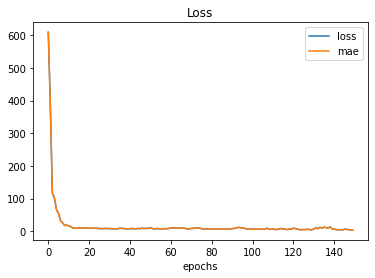

In [57]:
# Plot history training curve
pd.DataFrame(history.history).plot()
plt.title("Loss")
plt.xlabel("epochs")

In [61]:
# Evaluate the model on the test dataset
model_2.evaluate(x_test, y_test)

2/2 [==============================] - 1s 7ms/step - loss: 5.1088 - mae: 5.1088


[5.10882568359375, 5.10882568359375]

In [62]:
y_pred = model_2.predict(x_test)
y_pred

array([[1614.5634],
       [1624.5801],
       [1634.5969],
       [1644.6138],
       [1654.6306],
       [1664.6475],
       [1674.6643],
       [1684.681 ],
       [1694.6978],
       [1704.7146],
       [1714.7314],
       [1724.7483],
       [1734.7653],
       [1744.782 ],
       [1754.7988],
       [1764.8156],
       [1774.8324],
       [1784.8494],
       [1794.866 ],
       [1804.8828],
       [1814.8994],
       [1824.9163],
       [1834.9331],
       [1844.95  ],
       [1854.9669],
       [1864.9839],
       [1875.0005],
       [1885.0173],
       [1895.0342],
       [1905.0508],
       [1915.0676],
       [1925.0845],
       [1935.1012],
       [1945.118 ],
       [1955.1349],
       [1965.1516],
       [1975.1685],
       [1985.1854],
       [1995.2021],
       [2005.219 ]], dtype=float32)

In [63]:
y_test

<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([1620., 1630., 1640., 1650., 1660., 1670., 1680., 1690., 1700.,
       1710., 1720., 1730., 1740., 1750., 1760., 1770., 1780., 1790.,
       1800., 1810., 1820., 1830., 1840., 1850., 1860., 1870., 1880.,
       1890., 1900., 1910., 1920., 1930., 1940., 1950., 1960., 1970.,
       1980., 1990., 2000., 2010.], dtype=float32)>

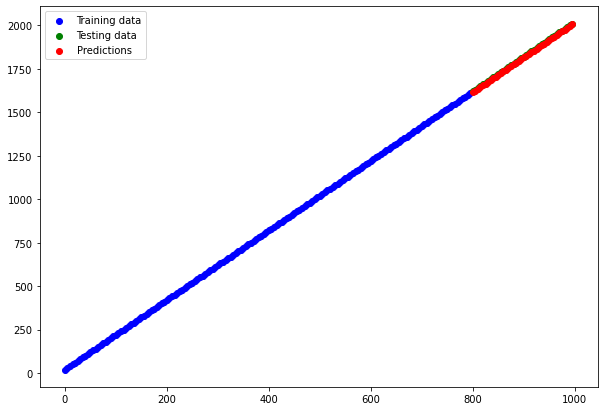

In [65]:
plot_predictions(train_data=x_train,
                train_labels=y_train,
                test_data=x_test,
                test_labels=y_test,
                predictions=y_pred)

In [66]:
# Calciulate the mae and mse of mode_2
mae_2 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mse_2 = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=5.1088257>,
 <tf.Tensor: shape=(), dtype=float32, numpy=26.137753>)

## 3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
* Building a larger model (how does one with 4 dense layers go?).
* Increasing the number of units in each layer.
* Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?
* What happens if you train for longer (say 300 epochs instead of 200)?

In [2]:
import pandas as pd
# Read the dataset
data =pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data_one_hot = pd.get_dummies(data)
data_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [5]:
x, y = data_one_hot.loc[:, data_one_hot.columns!="charges"], data_one_hot["charges"]
x, y

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0      19  27.900         0           1         0          0           1   
 1      18  33.770         1           0         1          1           0   
 2      28  33.000         3           0         1          1           0   
 3      33  22.705         0           0         1          1           0   
 4      32  28.880         0           0         1          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1333   50  30.970         3           0         1          1           0   
 1334   18  31.920         0           1         0          1           0   
 1335   18  36.850         0           1         0          1           0   
 1336   21  25.800         0           1         0          1           0   
 1337   61  29.070         0           1         0          0           1   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [6]:
from sklearn.model_selection import train_test_split

# split the dataset into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
# Check the shape of our data
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

In [9]:
import tensorflow as tf

### Building a larger model (how does one with 4 dense layers go?)

In [11]:
# let's build a model
# set random seed
tf.random.set_seed(42)

# Create a model
data_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(12),
    tf.keras.layers.Dense(1)
])

# Complie the model
data_model_1.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["mae"])

# Fit the model
history_model_1 = data_model_1.fit(x_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 13146.6318 - mae: 13146.6318
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 10599.1631 - mae: 10599.1631
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7460.2739 - mae: 7460.2739
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7313.8081 - mae: 7313.8081
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7226.6792 - mae: 7226.6792
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7119.4399 - mae: 7119.4399
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7012.7163 - mae: 7012.7163
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 6874.6323 - mae: 6874.6323
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 6734.7544 - mae: 6734.7544
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 6639.8989 - mae: 6639.

Text(0.5, 0, 'epochs')

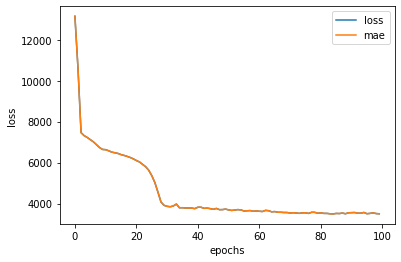

In [14]:
import matplotlib.pyplot as plt
# plot training curves
pd.DataFrame(history_model_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [15]:
data_model_1.evaluate(x_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3169.8928 - mae: 3169.8928


[3169.892822265625, 3169.892822265625]

### Increasing the number of units in each layer.

In [16]:
# Let's build another model by increasing the number of units in each layer this time

# set random seed
tf.random.set_seed(42)

# create a model
data_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(200), # increase each neuron by 100
    tf.keras.layers.Dense(150),
    tf.keras.layers.Dense(125),
    tf.keras.layers.Dense(112),
    tf.keras.layers.Dense(1)
])

# Compile the model
data_model_2.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["mae"])

# fit the model
history_model_2 = data_model_2.fit(x_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 10866.4834 - mae: 10866.4834
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7460.1973 - mae: 7460.1973
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7106.7876 - mae: 7106.7876
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 6853.7490 - mae: 6853.7490
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 6695.6646 - mae: 6695.6646
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 6612.0439 - mae: 6612.0439
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 6553.9023 - mae: 6553.9023
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 6515.5615 - mae: 6515.5615
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 6418.5566 - mae: 6418.5566
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 6353.1470 - mae: 6353.14

In [17]:
# Evaluate model2
data_model_2.evaluate(x_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3174.8164 - mae: 3174.8164


[3174.81640625, 3174.81640625]

### Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?

In [18]:
# Build another model by increasing the learning rate by 10x
# set random seed
tf.random.set_seed(42)

# Create a model
data_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(12),
    tf.keras.layers.Dense(1)
])

# Complie the model
data_model_3.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.Adam(lr=0.01), # increase the defeault lr by 10x
                     metrics=["mae"])

# Fit the model
history_model_3 = data_model_1.fit(x_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 3497.1135 - mae: 3497.1135
Epoch 2/100
 1/34 [..............................] - ETA: 0s - loss: 3406.3618 - mae: 3406.3618

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


34/34 [==============================] - 0s 4ms/step - loss: 3520.0833 - mae: 3520.0833
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 3508.8811 - mae: 3508.8811
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 3503.8440 - mae: 3503.8440
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 3515.1973 - mae: 3515.1973
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 3573.2620 - mae: 3573.2620
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 3507.6582 - mae: 3507.6582
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 3552.0825 - mae: 3552.0825
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 3514.2566 - mae: 3514.2566
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 3540.7231 - mae: 3540.7231
Epoch 11/100
34/34 [==============================] - 0s 3ms/step - loss: 3530.3120 - mae: 3530.3120
Epoch 12/1

In [19]:
# Evaluate data_model_3 on the test dataset
data_model_3.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 12979.7881 - mae: 12979.7881


[12979.7880859375, 12979.7880859375]

#### When we increase the default learning rate by 10x, our model performs almost the same result as the default learning rate on the training dataset. However, the model performs too bad on the test (unseen) dataset. Thus, it can't generalize better than the other models.

### What happens if you train for longer (say 300 epochs instead of 200)?

In [21]:
# Now let's train data_model_1 for longer (300 epochs)

# Set random seed
tf.random.set_seed(42)

# Create a model
data_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(12),
    tf.keras.layers.Dense(1)
])

# Complie the model
data_model_4.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["mae"])

# Fit the model
history_model_4 = data_model_4.fit(x_train, y_train, epochs=300)

Epoch 1/300
34/34 [==============================] - 1s 3ms/step - loss: 13146.6318 - mae: 13146.6318
Epoch 2/300
34/34 [==============================] - 0s 3ms/step - loss: 10599.1631 - mae: 10599.1631
Epoch 3/300
34/34 [==============================] - 0s 2ms/step - loss: 7460.2739 - mae: 7460.2739
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 7313.8081 - mae: 7313.8081
Epoch 5/300
34/34 [==============================] - 0s 3ms/step - loss: 7226.6792 - mae: 7226.6792
Epoch 6/300
34/34 [==============================] - 0s 3ms/step - loss: 7119.4399 - mae: 7119.4399
Epoch 7/300
34/34 [==============================] - 0s 2ms/step - loss: 7012.7163 - mae: 7012.7163
Epoch 8/300
34/34 [==============================] - 0s 2ms/step - loss: 6874.6323 - mae: 6874.6323
Epoch 9/300
34/34 [==============================] - 0s 1ms/step - loss: 6734.7544 - mae: 6734.7544
Epoch 10/300
34/34 [==============================] - 0s 2ms/step - loss: 6639.8989 - mae: 6639.

In [22]:
# Evaluate data_model_4
data_model_4.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3244.0710 - mae: 3244.0710


[3244.071044921875, 3244.071044921875]

After running the above experiments, we can conclude that data_model_1 (the model with four layer and default learning rate trainined for 100 epochs) performs better than the other models.

### Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it.

In [23]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(path="boston_housing.npz",
                                                                                  test_split=0.2,
                                                                                  seed=42)

65536/57026 [==================================] - 0s 0us/step


In [24]:
# Check the shape of the data
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

The dataset is already preprocessed (normalized and in tensor format), we don't need to do any preprocessing.

In [26]:
# Let's build a model 

tf.random.set_seed(42)

# Create a model 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(200), 
  tf.keras.layers.Dense(100), 
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])


# Compile the model 
model.compile(loss = tf.keras.losses.mae , 
              optimizer = tf.keras.optimizers.Adam() , 
              metrics = ['mae'])

# Fit the model 
history_botson = model.fit(x_train , y_train , epochs=200 )

Epoch 1/200
13/13 [==============================] - 0s 2ms/step - loss: 67.5498 - mae: 67.5498
Epoch 2/200
13/13 [==============================] - 0s 2ms/step - loss: 24.3902 - mae: 24.3902
Epoch 3/200
13/13 [==============================] - 0s 2ms/step - loss: 11.0051 - mae: 11.0051
Epoch 4/200
13/13 [==============================] - 0s 2ms/step - loss: 8.7134 - mae: 8.7134
Epoch 5/200
13/13 [==============================] - 0s 2ms/step - loss: 8.0325 - mae: 8.0325
Epoch 6/200
13/13 [==============================] - 0s 2ms/step - loss: 8.3708 - mae: 8.3708
Epoch 7/200
13/13 [==============================] - 0s 2ms/step - loss: 7.5760 - mae: 7.5760
Epoch 8/200
13/13 [==============================] - 0s 2ms/step - loss: 6.3508 - mae: 6.3508
Epoch 9/200
13/13 [==============================] - 0s 2ms/step - loss: 6.3399 - mae: 6.3399
Epoch 10/200
13/13 [==============================] - 0s 2ms/step - loss: 8.7520 - mae: 8.7520
Epoch 11/200
13/13 [==============================] -

In [27]:
# Evaluate the model on the test data
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 3.8643 - mae: 3.8643


[3.8643016815185547, 3.8643016815185547]

Text(0.5, 0, 'epochs')

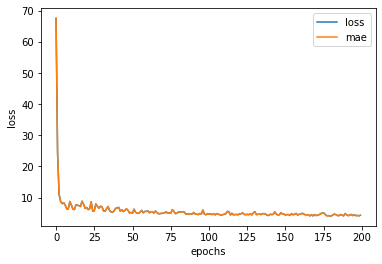

In [28]:
# Plot the training loss
pd.DataFrame(history_botson.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")